In [1]:
def read_pgm(pgmf):
    rs = pgmf.readline()
    rd = pgmf.readline()
    if str(rd).find('#') != -1 :
        rd = pgmf.readline()
    (width, height) = [int(i) for i in rd.split()]
    depth = int(pgmf.readline())

    raster = []
    for y in range(height):
        row = []
        for x in range(width):
            row.append(ord(pgmf.read(1)))
        raster.append(row)
    return raster

In [3]:
file = open("./1/scaled_shapes.pgm",'rb')
file_new = read_pgm(file)
file.close()


In [4]:
def Object_detect(pic):
    obj = []
    different = [ ]
    for row in pic:
        for pixel in row:
           if (pixel not in different) and ( pixel != 255) : different.append(pixel)
    turn_array = [x for b in pic for x in b]
    for resouce in different:
        if turn_array.count(resouce) > 1000 : obj.append(resouce)
    return obj

In [5]:
ffile = Object_detect(file_new)
ffile.sort()

In [6]:
print(ffile)

[0, 80, 120, 160, 200]


In [7]:
def Obj(pic,level):
    return [[1 if j == level else 0 for j in k] for k in pic]

In [8]:
def m(pic,p,q) :
    sum = 0
    w = len(pic[0])
    h = len(pic)
    for i in range (h) :
        for j in range (w) :
            sum += (j**p) * (i**q) * pic[i][j]
    return sum

In [9]:
def u(pic,p,q) :
    xx = m(pic,1,0) / m(pic,0,0)
    yy = m(pic,0,1) / m(pic,0,0)
    sumu = 0
    wu = len(pic[0])
    hu = len(pic)
    for i in range (hu) :
        for j in range (wu) :
            sumu += ((j-xx)**p) * ((i-yy)**q) * pic[i][j]
    return sumu

In [10]:
def nn(pic,p,q) :
    return u(pic,p,q) / u(pic,0,0)**(((p+q)/2)+1)

In [11]:
def free(pic) :
    return nn(pic,2,0) + nn(pic,0,2)

In [12]:
find = []
for level in ffile:
    find.append(Obj(file_new,level))

In [13]:
for i in find :
    print("{:.4f}".format(free(i)))

0.3015
0.3012
0.2882
0.2648
0.3177


In [14]:
import matplotlib.pyplot as plt

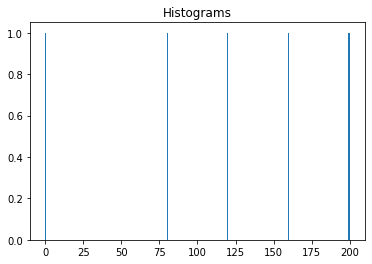

In [20]:
plt.hist(ffile,256)
plt.title("Histograms")
plt.show()